<h1 align="center"><font size="6"><strong>Analyzing the Landscape of Diabetes : Insights from the BRFSS 2021 Dataset</strong></font></h1> 

------------------------------------------------

## Anggota Kelompok
1. X
2. X
3. X
4. X


---

## 1. Overview (Perkenalan)
#### **Latar Belakang**
Diabetes, sebagai masalah kesehatan global, meningkatkan perhatian karena dampak kronisnya. Tipe 1, tipe 2, dan gestasional adalah varian utama dengan karakteristik berbeda. Prevalensi diabetes di AS meningkat dari 2010 hingga 2021, mendorong analisis menggunakan metode klasifikasi Naive Bayes. Harapannya, analisis ini memberikan wawasan mendalam tentang faktor risiko dan kontribusi pada diabetes, mendukung upaya pencegahan, manajemen, dan pemahaman kondisi ini dalam masyarakat.

#### **Dataset**
Dataset yang digunakan untuk analisis ini adalah "Diabetes Health Indicators Dataset", diunduh dari Kaggle [di sini](https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset).

Dataset ini adalah hasil dari Behavioral Risk Factor Surveillance System (BRFSS) 2021, sebuah survei telepon berbasis negara yang mengumpulkan data tentang perilaku risiko kesehatan, kondisi kesehatan kronis, dan penggunaan layanan pencegahan di kalangan orang dewasa di Amerika Serikat. Dataset ini terdiri dari 22 atribut dan 236.378 baris. Variabel targetnya adalah  Diabetes_012 yang memiliki 3 kelas: 0 untuk tidak ada diabetes atau hanya selama kehamilan, 1 untuk prediabetes, dan 2 untuk diabetes.

#### **Objective yang Ingin Dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Menganalisis hubungan antara faktor-faktor risiko yang terdapat dalam dataset dengan tingkat diabetes.

- Menerapkan metode klasifikasi Naive Bayes pada dataset untuk membuat model yang dapat mengklasifikasikan responden menjadi kelompok diabetes yang berbeda.

## 2. Import Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB, ComplementNB, CategoricalNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

import missingno as msno

## 3. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
df = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2021.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,0,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,0,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,1,0,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [5]:
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
236373,2.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,1,0,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,1,0,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0
236377,0.0,0,1.0,1,32.0,0.0,0.0,0.0,1,0,0,0,1,0.0,1.0,2.0,2.0,0.0,0,6,6.0,6.0


In [6]:
df.shape

(236378, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [8]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.307791,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,0.827767,0.062083,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.705037,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,0.377583,0.241306,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [11]:
for col in df.columns:
    print(col,':', df[col].nunique())

Diabetes_012 : 3
HighBP : 2
HighChol : 2
CholCheck : 2
BMI : 84
Smoker : 2
Stroke : 2
HeartDiseaseorAttack : 2
PhysActivity : 2
Fruits : 2
Veggies : 2
HvyAlcoholConsump : 2
AnyHealthcare : 2
NoDocbcCost : 2
GenHlth : 5
MentHlth : 31
PhysHlth : 31
DiffWalk : 2
Sex : 2
Age : 13
Education : 6
Income : 11


## 4. Data Cleaning
Bagian ini mencakup langkah-langkah persiapan data sebelum melanjutkan eksplorasi lebih lanjut. Tahap pembersihan data melibatkan tindakan-tindakan seperti memberikan nama baru pada setiap kolom, menangani nilai yang hilang, menghilangkan kolom yang tidak relevan, dan langkah-langkah lain untuk memastikan kebersihan dan keteraturan data sebelum dilakukan analisis lebih lanjut.

In [12]:
df.duplicated().sum()

12828

In [13]:
df = df.drop_duplicates()

In [14]:
drop_cols = ['CholCheck', 'HeartDiseaseorAttack', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Education', 'Income']

In [15]:
df = df.drop(drop_cols, axis=1)
df.head()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,PhysActivity,Fruits,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age
0,0.0,0,1.0,15.0,1.0,0.0,0,1,0,10.0,20.0,0,11
1,2.0,1,0.0,28.0,0.0,0.0,0,1,0,0.0,0.0,0,11
2,2.0,1,1.0,33.0,0.0,0.0,1,1,0,10.0,0.0,0,9
3,2.0,0,1.0,29.0,0.0,1.0,1,1,0,0.0,30.0,1,12
4,0.0,0,0.0,24.0,1.0,0.0,0,0,0,0.0,0.0,1,13


In [37]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth',
       'Sex', 'Age'],
      dtype='object')

In [16]:
df.max(axis=0)['Age']

13.0

In [17]:
df.min(axis=0)['Age']

1.0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


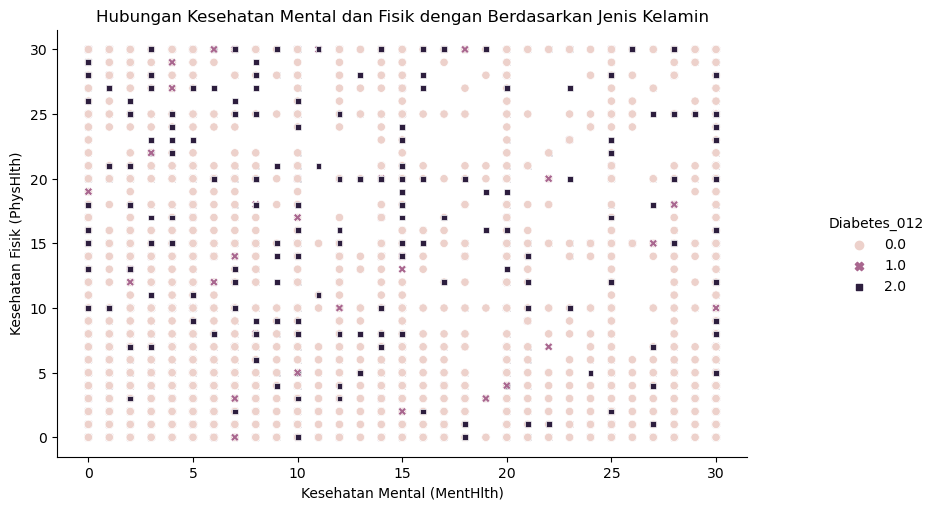

In [42]:
g=sns.relplot(x='MentHlth', y='PhysHlth', data=df, hue='Diabetes_012', style='Diabetes_012')
g.fig.set_size_inches(10,5)
plt.xlabel('Kesehatan Mental (MentHlth)')
plt.ylabel('Kesehatan Fisik (PhysHlth)')
plt.title('Hubungan Kesehatan Mental dan Fisik dengan Berdasarkan Kondisi Diabetes')
plt.show()

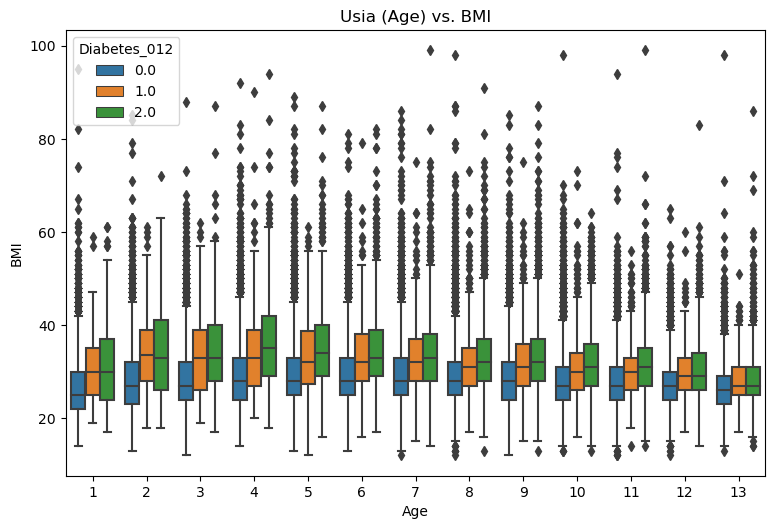

In [46]:
plt.figure(figsize=(15, 10))

# Box plot Usia (Age) vs. BMI
plt.subplot(2, 2, 1)
sns.boxplot(x='Age', y='BMI', data=df, hue='Diabetes_012')
plt.title('Usia (Age) vs. BMI')
plt.tight_layout()
plt.show()

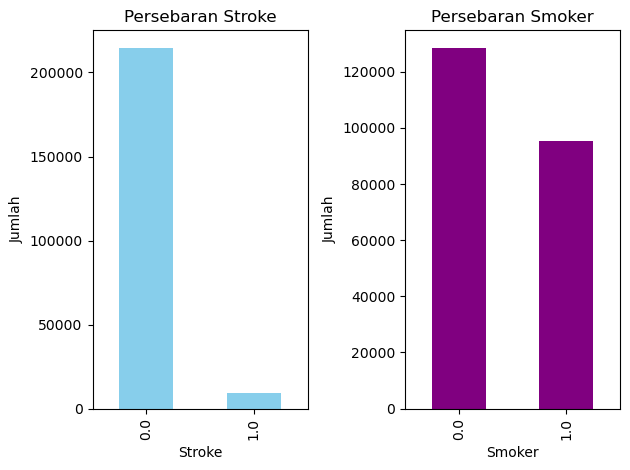

In [20]:
plt.subplot(1, 2, 1)
df['Stroke'].value_counts().plot.bar(color='skyblue')
plt.title('Persebaran Stroke')
plt.xlabel('Stroke')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
df['Smoker'].value_counts().plot.bar(color='purple')
plt.title('Persebaran Smoker')
plt.xlabel('Smoker')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [21]:
df.corr()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,PhysActivity,Fruits,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age
Diabetes_012,1.000000,0.263919,0.204422,0.204167,0.048561,0.098964,-0.142070,-0.019883,-0.064860,0.028714,0.155713,0.036045,0.201837
HighBP,0.263919,1.000000,0.274129,0.202857,0.085932,0.124283,-0.122115,-0.019032,-0.009784,-0.000654,0.132883,0.067550,0.345298
HighChol,0.204422,0.274129,1.000000,0.077679,0.073066,0.084369,-0.069447,-0.015913,-0.018917,0.011906,0.099634,0.026811,0.284193
BMI,0.204167,0.202857,0.077679,1.000000,0.001134,0.004882,-0.153241,-0.076961,-0.039525,0.077238,0.110862,0.002245,-0.054017
Smoker,0.048561,0.085932,0.073066,0.001134,1.000000,0.052627,-0.081525,-0.059289,0.094171,0.073555,0.103651,0.075528,0.121241
Stroke,0.098964,0.124283,0.084369,0.004882,0.052627,1.000000,-0.073689,0.005225,-0.016495,0.040045,0.127730,0.002122,0.131403
PhysActivity,-0.142070,-0.122115,-0.069447,-0.153241,-0.081525,-0.073689,1.000000,0.106813,0.021514,-0.103774,-0.238717,0.058630,-0.121327
Fruits,-0.019883,-0.019032,-0.015913,-0.076961,-0.059289,0.005225,0.106813,1.000000,-0.037654,-0.046557,-0.020799,-0.053927,0.073002
HvyAlcoholConsump,-0.064860,-0.009784,-0.018917,-0.039525,0.094171,-0.016495,0.021514,-0.037654,1.000000,0.033771,-0.026095,-0.004721,-0.052482
MentHlth,0.028714,-0.000654,0.011906,0.077238,0.073555,0.040045,-0.103774,-0.046557,0.033771,1.000000,0.297840,-0.105048,-0.169659


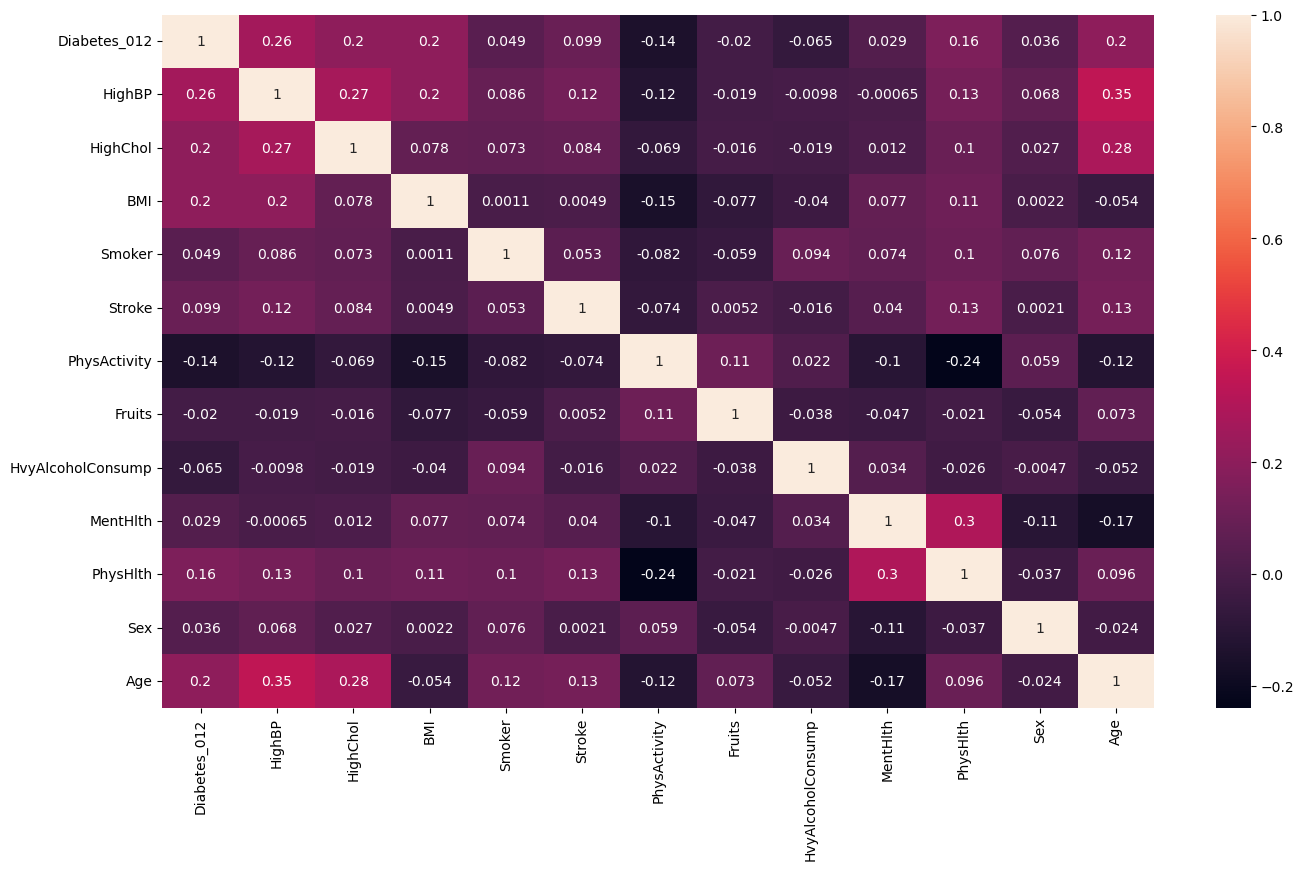

In [22]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 5. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [23]:
X=df.drop('Diabetes_012', axis=1)
y=df['Diabetes_012']

In [24]:
X.head()

,HighBP,HighChol,BMI,Smoker,Stroke,PhysActivity,Fruits,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age
0,0,1.0,15.0,1.0,0.0,0,1,0,10.0,20.0,0,11
1,1,0.0,28.0,0.0,0.0,0,1,0,0.0,0.0,0,11
2,1,1.0,33.0,0.0,0.0,1,1,0,10.0,0.0,0,9
3,0,1.0,29.0,0.0,1.0,1,1,0,0.0,30.0,1,12
4,0,0.0,24.0,1.0,0.0,0,0,0,0.0,0.0,1,13


In [25]:
y.head()

0    0.0
1    2.0
2    2.0
3    2.0
4    0.0
Name: Diabetes_012, dtype: float64

In [26]:
le=LabelEncoder()
y= le.fit_transform(y)
y

array([0, 2, 2, ..., 0, 0, 0], dtype=int64)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of X_train is: (178840, 12)
The shape of X_test is: (44710, 12)
The shape of y_train is: (178840,)
The shape of y_test is: (44710,)


In [28]:
model1 = GaussianNB()
model1.fit(X_train, y_train)

GaussianNB()

In [29]:
model2 = MultinomialNB()
model2.fit(X_train, y_train)

MultinomialNB()

In [30]:
model3 = BernoulliNB()
model3.fit(X_train, y_train)

BernoulliNB()

In [31]:
model4 = ComplementNB()
model4.fit(X_train, y_train)

ComplementNB()

In [32]:
model5 = CategoricalNB()
model5.fit(X_train, y_train)

CategoricalNB()

In [33]:
# Prediksi menggunakan Model 1 (Gaussian Naive Bayes)
pred_train_model1 = model1.predict(X_train)
cm_model1 = confusion_matrix(y_train, pred_train_model1)

# Menampilkan hasil Model 1
print("=== Model 1: Gaussian Naive Bayes ===")
print(f"Confusion Matrix:\n{cm_model1}")
print(f"Accuracy: {accuracy_score(y_train, pred_train_model1)}")
print("\n")

# Prediksi menggunakan Model 2 (Multinomial Naive Bayes)
pred_train_model2 = model2.predict(X_train)
cm_model2 = confusion_matrix(y_train, pred_train_model2)

# Menampilkan hasil Model 2
print("=== Model 2: Multinomial Naive Bayes ===")
print(f"Confusion Matrix:\n{cm_model2}")
print(f"Accuracy: {accuracy_score(y_train, pred_train_model2)}")
print("\n")

# Prediksi menggunakan Model 3 (Bernoulli Naive Bayes)
pred_train_model3 = model3.predict(X_train)
cm_model3 = confusion_matrix(y_train, pred_train_model3)

# Menampilkan hasil Model 3
print("=== Model 3: Bernoulli Naive Bayes ===")
print(f"Confusion Matrix:\n{cm_model3}")
print(f"Accuracy: {accuracy_score(y_train, pred_train_model3)}")
print("\n")

# Prediksi menggunakan Model 4 (Complement Naive Bayes)
pred_train_model4 = model4.predict(X_train)
cm_model4 = confusion_matrix(y_train, pred_train_model4)

# Menampilkan hasil Model 4
print("=== Model 4: Complement Naive Bayes ===")
print(f"Confusion Matrix:\n{cm_model4}")
print(f"Accuracy: {accuracy_score(y_train, pred_train_model4)}")
print("\n")

# Prediksi menggunakan Model 5 (Categorical Naive Bayes)
pred_train_model5 = model5.predict(X_train)
cm_model5 = confusion_matrix(y_train, pred_train_model5)

# Menampilkan hasil Model 5
print("=== Model 5: Categorical Naive Bayes ===")
print(f"Confusion Matrix:\n{cm_model5}")
print(f"Accuracy: {accuracy_score(y_train, pred_train_model5)}")
print("\n")

=== Model 1: Gaussian Naive Bayes ===
Confusion Matrix:
[[129753     34  17798]
 [  3331      3   1164]
 [ 16260     15  10482]]
Accuracy: 0.7841534332364124


=== Model 2: Multinomial Naive Bayes ===
Confusion Matrix:
[[129014      0  18571]
 [  3612      0    886]
 [ 19400      0   7357]]
Accuracy: 0.7625307537463655


=== Model 3: Bernoulli Naive Bayes ===
Confusion Matrix:
[[140951      0   6634]
 [  4004      0    494]
 [ 21562      0   5195]]
Accuracy: 0.8171885484231716


=== Model 4: Complement Naive Bayes ===
Confusion Matrix:
[[123062      0  24523]
 [  3401      0   1097]
 [ 17916      0   8841]]
Accuracy: 0.7375475285171103


=== Model 5: Categorical Naive Bayes ===
Confusion Matrix:
[[135244      0  12341]
 [  3492      3   1003]
 [ 17241      1   9515]]
Accuracy: 0.8094497875195705




In [34]:
pred_test = model1.predict(X_test)
pred_test = model2.predict(X_test)
pred_test = model3.predict(X_test)
pred_test = model4.predict(X_test)
pred_test = model5.predict(X_test)

In [35]:
# Evaluasi Model pada Data Pengujian

# Model 1: Gaussian Naive Bayes
pred_test_model1 = model1.predict(X_test)
cm_model1 = confusion_matrix(y_test, pred_test_model1)
accuracy_model1 = accuracy_score(y_test, pred_test_model1)
precision_model1 = precision_score(y_test, pred_test_model1, average="micro")
recall_model1 = recall_score(y_test, pred_test_model1, average="micro")
f1_model1 = f1_score(y_test, pred_test_model1, average="micro")

# Model 2: Multinomial Naive Bayes
pred_test_model2 = model2.predict(X_test)
cm_model2 = confusion_matrix(y_test, pred_test_model2)
accuracy_model2 = accuracy_score(y_test, pred_test_model2)
precision_model2 = precision_score(y_test, pred_test_model2, average="micro")
recall_model2 = recall_score(y_test, pred_test_model2, average="micro")
f1_model2 = f1_score(y_test, pred_test_model2, average="micro")

# Model 3: Bernoulli Naive Bayes
pred_test_model3 = model3.predict(X_test)
cm_model3 = confusion_matrix(y_test, pred_test_model3)
accuracy_model3 = accuracy_score(y_test, pred_test_model3)
precision_model3 = precision_score(y_test, pred_test_model3, average="micro")
recall_model3 = recall_score(y_test, pred_test_model3, average="micro")
f1_model3 = f1_score(y_test, pred_test_model3, average="micro")

# Model 4: Complement Naive Bayes
pred_test_model4 = model4.predict(X_test)
cm_model4 = confusion_matrix(y_test, pred_test_model4)
accuracy_model4 = accuracy_score(y_test, pred_test_model4)
precision_model4 = precision_score(y_test, pred_test_model4, average="micro")
recall_model4 = recall_score(y_test, pred_test_model4, average="micro")
f1_model4 = f1_score(y_test, pred_test_model4, average="micro")

# Model 5: Categorical Naive Bayes
pred_test_model5 = model5.predict(X_test)
cm_model5 = confusion_matrix(y_test, pred_test_model5)
accuracy_model5 = accuracy_score(y_test, pred_test_model5)
precision_model5 = precision_score(y_test, pred_test_model5, average="micro")
recall_model5 = recall_score(y_test, pred_test_model5, average="micro")
f1_model5 = f1_score(y_test, pred_test_model5, average="micro")

# Menampilkan Hasil Evaluasi untuk Setiap Model
print("=== Evaluation on Test Data ===")

# Model 1: Gaussian Naive Bayes
print("\nModel 1: Gaussian Naive Bayes")
print(f"Confusion Matrix:\n{cm_model1}")
print(f"Accuracy: {accuracy_model1:.4f}")
print(f"Precision: {precision_model1:.4f}")
print(f"Recall: {recall_model1:.4f}")
print(f"F1 Score: {f1_model1:.4f}")

# Model 2: Multinomial Naive Bayes
print("\nModel 2: Multinomial Naive Bayes")
print(f"Confusion Matrix:\n{cm_model2}")
print(f"Accuracy: {accuracy_model2:.4f}")
print(f"Precision: {precision_model2:.4f}")
print(f"Recall: {recall_model2:.4f}")
print(f"F1 Score: {f1_model2:.4f}")

# Model 3: Bernoulli Naive Bayes
print("\nModel 3: Bernoulli Naive Bayes")
print(f"Confusion Matrix:\n{cm_model3}")
print(f"Accuracy: {accuracy_model3:.4f}")
print(f"Precision: {precision_model3:.4f}")
print(f"Recall: {recall_model3:.4f}")
print(f"F1 Score: {f1_model3:.4f}")

# Model 4: Complement Naive Bayes
print("\nModel 4: Complement Naive Bayes")
print(f"Confusion Matrix:\n{cm_model4}")
print(f"Accuracy: {accuracy_model4:.4f}")
print(f"Precision: {precision_model4:.4f}")
print(f"Recall: {recall_model4:.4f}")
print(f"F1 Score: {f1_model4:.4f}")

# Model 4: Categorical Naive Bayes
print("\nModel 4: Categorical Naive Bayes")
print(f"Confusion Matrix:\n{cm_model5}")
print(f"Accuracy: {accuracy_model5:.4f}")
print(f"Precision: {precision_model5:.4f}")
print(f"Recall: {recall_model5:.4f}")
print(f"F1 Score: {f1_model5:.4f}")

=== Evaluation on Test Data ===

Model 1: Gaussian Naive Bayes
Confusion Matrix:
[[32542     7  4408]
 [  816     1   298]
 [ 4070     3  2565]]
Accuracy: 0.7852
Precision: 0.7852
Recall: 0.7852
F1 Score: 0.7852

Model 2: Multinomial Naive Bayes
Confusion Matrix:
[[32362     0  4595]
 [  909     0   206]
 [ 4838     0  1800]]
Accuracy: 0.7641
Precision: 0.7641
Recall: 0.7641
F1 Score: 0.7641

Model 3: Bernoulli Naive Bayes
Confusion Matrix:
[[35327     0  1630]
 [  989     0   126]
 [ 5361     0  1277]]
Accuracy: 0.8187
Precision: 0.8187
Recall: 0.8187
F1 Score: 0.8187

Model 4: Complement Naive Bayes
Confusion Matrix:
[[30861     0  6096]
 [  842     0   273]
 [ 4476     0  2162]]
Accuracy: 0.7386
Precision: 0.7386
Recall: 0.7386
F1 Score: 0.7386

Model 4: Categorical Naive Bayes
Confusion Matrix:
[[33828     0  3129]
 [  855     0   260]
 [ 4329     0  2309]]
Accuracy: 0.8083
Precision: 0.8083
Recall: 0.8083
F1 Score: 0.8083


## Kesimpulan
Berikut adalah kesimpulan berdasarkan evaluasi model Naive Bayes pada data uji:

1. **Model 1: Gaussian Naive Bayes**
   - Akurasi: 78.52%
   - Precision, Recall, dan F1 Score: 78.52%
   - Confusion Matrix menunjukkan model dapat dengan baik mengklasifikasikan kelas 0 (no diabetes), namun memiliki kesulitan dalam mengidentifikasi kelas 1 (prediabetes) dan kelas 2 (diabetes).

2. **Model 2: Multinomial Naive Bayes**
   - Akurasi: 76.41%
   - Precision, Recall, dan F1 Score: 76.41%
   - Model ini tampaknya memiliki kinerja serupa dengan Model 1 dalam hal akurasi dan metrik evaluasi lainnya.

3. **Model 3: Bernoulli Naive Bayes**
   - Akurasi: 81.87%
   - Precision, Recall, dan F1 Score: 81.87%
   - Model ini memiliki akurasi yang lebih tinggi dan secara keseluruhan kinerja yang lebih baik dalam mengklasifikasikan ketiga kelas.

4. **Model 4: Complement Naive Bayes**
   - Akurasi: 73.86%
   - Precision, Recall, dan F1 Score: 73.86%
   - Model ini cenderung memiliki kinerja yang lebih rendah dibandingkan dengan model lainnya dalam hal akurasi dan metrik evaluasi lainnya.

5. **Model 5: Categorical Naive Bayes**
   - Akurasi: 80.83%
   - Precision, Recall, dan F1 Score: 80.83%
   - Model ini menunjukkan kinerja yang baik, meskipun tidak sebaik Model 3 (Bernoulli Naive Bayes).
----
- Model 3 (Bernoulli Naive Bayes) adalah model terbaik di antara kelima model, dengan akurasi tertinggi dan keseimbangan yang baik antara Precision, Recall, dan F1 Score.
- Model 1 dan Model 2 memiliki kinerja yang serupa, dengan akurasi dan metrik evaluasi yang cukup baik.
- Model 4 (Complement Naive Bayes) memiliki kinerja yang lebih rendah dibandingkan dengan model lainnya.
- Model 5 (Categorical Naive Bayes) menunjukkan kinerja yang baik tetapi tidak sebaik Model 3.